<div style="color:red; font-family:Georgia; text-align:center; font-size:2em;">The Sinking of the RMS Titanic in the North Atlantic Ocean on April 14th, 1912</div>
<br>
<br>
<img src="Stöwer_Titanic.jpg">
    
<div style= "text-align:center;">

Untergang der Titanic ("Sinking of the Titanic")
by Willy Stöwer, 1912
<br>
<br>
    <b>More on the Titanic:</b>
   
    <a href="https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic">More About the Passengers</a> |
    <a href="http://mashable.com/2016/04/14/titanic-survivors/#cLxs014oWSqw">Pictures</a> |
</div>

<br>
If we were passengers aboard the Titanic on that most tragic night, what would our fate have been?  Being an adult woman, would I have had a greater chance of being among the survivors than any other group?  What can we discover by looking at the following data?  How many female survivors were there compared to male survivors?  What is the probability of survival for each gender, each class, and each age group?  What characteristics may have given us the greatest chance of survival?  Let's take a look by first importing our data... 
<br>
<br>

In [1]:
#import pandas and read in the csv file containing titanic data
#show the first 5 rows of the dataset

import pandas as pd

titanic= pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary taken from https://www.kaggle.com/c/titanic/data


Survived: Survival,  0 - No, 1 - Yes 

Pclass: Ticket class,  1 - 1st, 2 - 2nd, 3 - 3rd 

Sex: Sex	

Age: Age in years	

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number	

Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister;  
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father; 
Child = daughter, son, stepdaughter, stepson; 
Some children travelled only with a nanny, therefore parch=0 for them.

<br>
<br>
<b>Now that we've taken a look at the data, let's work through it and get it cleaned up a bit.  First, let's take a look at the columns with incomplete data.  Those columns include 'Cabin' and 'Age'.  Since cabin number is missing for most of the rows, we can assume that we won't be able to consider a person's cabin number when looking into survival.  So, we will just take that column out of our dataset altogether.  Age, however, is a very interesting point to consider, so we'll have to find a way to salvage the data that is missing in the 'Age' column.  We can solve that later in the analysis when we place each person into an age group.</b>
<br>
<br>

In [2]:
#remove the 'Cabin' column from the dataset

titanic.pop('Cabin')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now, let's change some of the data from numbers/quantitative data to categories/qualitative data.  We'll change the data in the Survived column from ones and zeros to 'Survived' and 'Died', and we'll change the classes to '1st Class', '2nd Class', and '3rd Class'.  We can also put the ages into groups later.

In [3]:
# Create Survival Label Column
titanic['Survival'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [4]:
# Create Pclass Label Column
titanic['Class'] = titanic.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

## SEX

In [5]:
#Difference in survival between Male and Female.  How many females survived and how many males?

male_female_survival = titanic.groupby('Sex').sum()['Survived']
male_female_survival

Sex
female    233
male      109
Name: Survived, dtype: int64

In [6]:
#total number of male passengers and total number of female passengers

total_male_female = titanic['Sex'].value_counts()
total_male_female

male      577
female    314
Name: Sex, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


female    0.742038
male      0.188908
dtype: float64


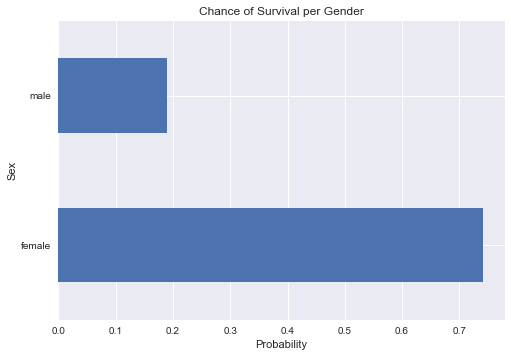

In [8]:
#calculate probability of survival for male passengers and for female passengers, then plot the result

male_female_percentages = male_female_survival/total_male_female
print male_female_percentages
prob_gender = male_female_percentages.plot(kind='barh',title='Chance of Survival per Gender')
prob_gender.set_xlabel('Probability');
prob_gender.set_ylabel('Sex');

It looks like there were over twice as many female survivors as there were male survivors, which may suggest a higher chance of survival if you were a female on the Titanic.  It's even more apparent when looking at the percentage of men that survived compared to the percentage of women.  If you were a woman, you had almost a 75% chance of survival, but men had a little less than 20% chance.  

Let's take a look at another variable and see what other characteristics may have given us a better chance of survival had we been a passenger on the Titanic.

## CLASS

In [9]:
#Difference in survival based on class

class_survival = titanic.groupby('Class').sum()['Survived']
class_survival

Class
First Class     136
Second Class     87
Third Class     119
Name: Survived, dtype: int64

Interesting!  It looks like you may have had a greater chance of survival if you were in third class as opposed to second class.  Let's take a closer look by finding the probabilities for each class instead of just the total number of survivors for each class.

In [10]:
#Find the probabilites for each class.
#First print the total number of passengers in each class, then output the probabilities.

num_class = titanic['Class'].value_counts()
print num_class
percent_survived = class_survival/num_class
percent_survived

Third Class     491
First Class     216
Second Class    184
Name: Class, dtype: int64


First Class     0.629630
Second Class    0.472826
Third Class     0.242363
dtype: float64

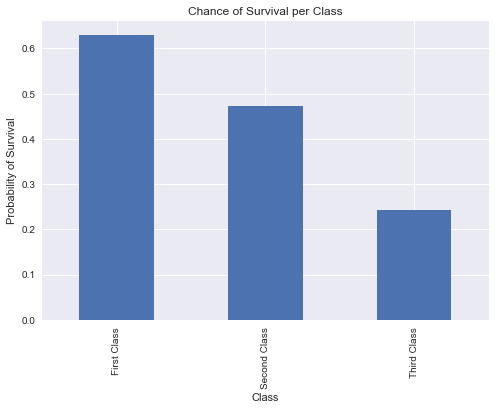

In [11]:
#plot the resulting probabilities

class_survival = percent_survived.plot(kind='bar',title='Chance of Survival per Class')

class_survival.set_xlabel('Class');
class_survival.set_ylabel('Probability of Survival');


That looks about right.  The lower, or 3rd class, passengers were the least likely to survive, followed by the 2nd class, and then the 1st class at the top of the pack.  So far, we would have wanted to be a first class woman had we been traveling on the Titanic that day.  

<br>


## AGE and FARE

In [12]:
#create a separate dataset that removes all rows without an age

unknown_age_removed = titanic.dropna(axis=0,how='any')


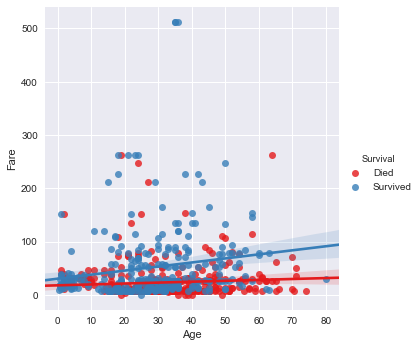

In [13]:
#Ages of Survivors and Non Survivors and each person's fare
# 0 = Did not survive
# 1 = Survived

age_survived_and_not = sns.lmplot(x='Age', y='Fare', hue='Survival', data=unknown_age_removed, palette='Set1')

In [14]:
#describe the ages of passengers on the Titanic

unknown_age_removed['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

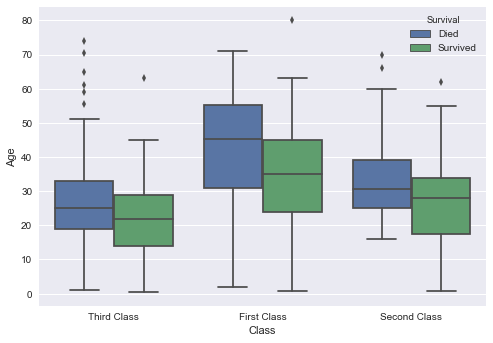

In [15]:
#boxplot showing survival of the ages per class

age_class_plot = sns.boxplot(x='Class',y='Age',hue='Survival',data=unknown_age_removed)

In [16]:
#Taking in the original dataset, put each person into one of four age groups: 
#Infant under 2, Child 2-12yrs, Adult 13-50yrs, or Older Adult 50+.

bins = [0,1,13,50,85]
age_groups = ['Infant','Child','Adult','Older Adult']
titanic['Age'] = pd.cut(titanic['Age'],bins,labels = age_groups)
titanic.head(10)

    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Died,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,Survived,First Class
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Died,Third Class
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Died,Third Class
6,7,0,1,"McCarthy, Mr. Timothy J",male,Older Adult,0,0,17463,51.8625,S,Died,First Class
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,349909,21.0750,S,Died,Third Class
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Adult,0,2,347742,11.1333,S,Survived,Third Class
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Adult,1,0,237736,30.0708,C,Survived,Second Class


In [17]:

def find_age_group(row):
    
    """For unknown ages, find the best 'Age' group by looking at the form of address in each name.
    For 'Miss' and 'Master', put them in the 'Child' age group, and for 'Mrs', 'Mr.', and 'Dr.', 
    put them in the 'Adult' age group"""
        
    if 'Miss.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Child'
        
    if 'Master.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Child'
            
    if 'Mrs.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult'
            
    if 'Mr.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult'
        
    if 'Dr.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult' 
        
    return row
        

In [18]:
titanic = titanic.apply(find_age_group,axis=1)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Died,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,Survived,First Class
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Died,Third Class


In [20]:
#number of survivors in each age group

each_age_group = titanic.groupby('Age').sum()['Survived']
each_age_group

Age
Adult          254
Child           54
Infant          12
Older Adult     22
Name: Survived, dtype: int64

In [21]:
#number of passengers in each age group

num_in_group = titanic['Age'].value_counts(sort=False)
print num_in_group

#chance of survival for those in each age group

age_survival = each_age_group/num_in_group
age_survival.sort_values(inplace=True)


Older Adult     64
Adult          716
Child           97
Infant          14
Name: Age, dtype: int64


<img src="mother_children.jpg" width='500' height='500' align=left>

As a mother myself, it is a relief to see that infants and children had a higher chance of survival.  I'm sure every mother and father aboard would have given up their own seat on the lifeboat if it meant their child(ren) would live.

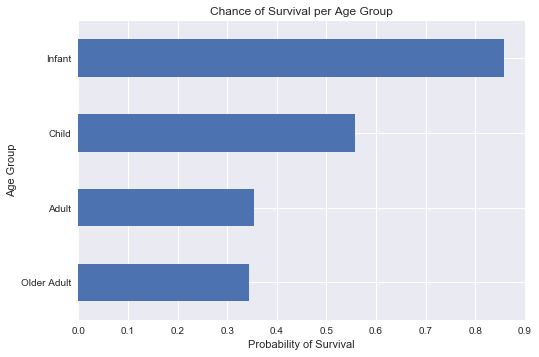

In [22]:
#let's take a look at a visual for age by plotting the probabilities

ap = age_survival.plot(kind='barh',title='Chance of Survival per Age Group')

ap.set_ylabel('Age Group');
ap.set_xlabel('Probability of Survival');


Well, now that we've looked at a few variables, let's put them all together.  So far, it looks like being a 1st class female infant would give you the greatest chance of survival.  Let's see if that could be true...

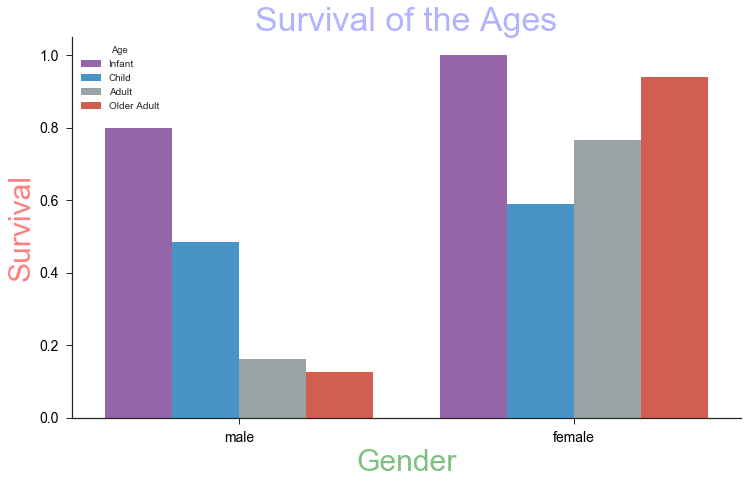

In [23]:
#code modified from http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/
#barplot showing male and female survival for each age group

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

g = sns.barplot(x="Sex", y="Survived", hue="Age", hue_order=['Infant','Child','Adult','Older Adult'],
    palette=sns.color_palette(flatui),data=titanic,ci=None)

sns.despine()

g.figure.set_size_inches(12,7)

g.axes.set_title('Survival of the Ages',fontsize=34,color="b",alpha=0.3)

g.set_xlabel("Gender",size = 30,color="g",alpha=0.5)

g.set_ylabel("Survival",size = 30,color="r",alpha=0.5)

g.tick_params(labelsize=14,labelcolor="black")

By looking at the bar plot above, we could say that female infants of any class had the highest chance of survival.  Let's break it down by class now...

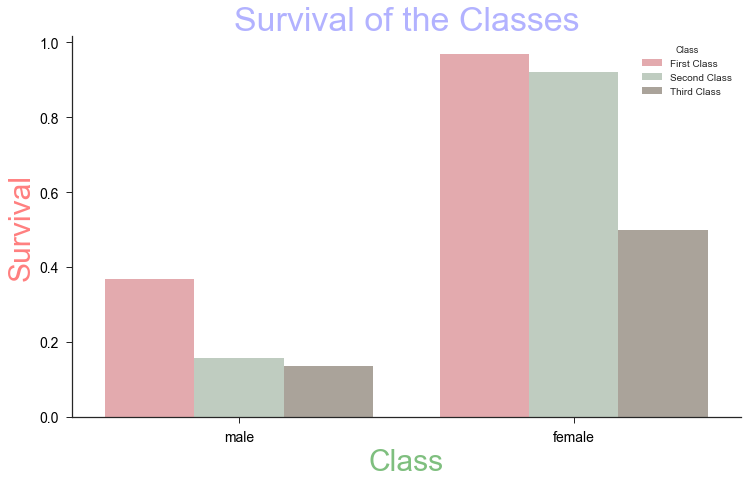

In [24]:
#make another barplot in order to show probabilities for males and females of each class

sns.set(style="ticks")

flatui = ["#eca1a6", "#bdcebe", "#ada397", "#e74c3c", "#34495e", "#2ecc71"]

h = sns.barplot(x="Sex", y="Survived", hue="Class", hue_order=['First Class','Second Class','Third Class'],
    palette=sns.color_palette(flatui),data=titanic,ci=None)

sns.despine()

h.figure.set_size_inches(12,7)

h.axes.set_title('Survival of the Classes',fontsize=34,color="b",alpha=0.3)

h.set_xlabel("Class",size = 30,color="g",alpha=0.5)

h.set_ylabel("Survival",size = 30,color="r",alpha=0.5)

h.tick_params(labelsize=14,labelcolor="black")

I'm curious, since they're such small groups, what characteristics the surviving male passengers had and what characteristics the females had that did not survive.  I think that I can tell, just by looking at the bar plots above, that most of the male passengers that survived were in first class and/or were infants/children.  I could also gather that those females that did not survive were most likely in 3rd class.  <b>Let's take a look...</b>

## MALES

In [25]:
#rows from titanic with unlikely variables for men aboard the Titanic

male_survivors = titanic[titanic.Sex.isin(['male'])].merge(titanic[titanic.Survived.isin([1])])
male_survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,18,1,2,"Williams, Mr. Charles Eugene",male,Adult,0,0,244373,13.0000,S,Survived,Second Class
1,22,1,2,"Beesley, Mr. Lawrence",male,Adult,0,0,248698,13.0000,S,Survived,Second Class
2,24,1,1,"Sloper, Mr. William Thompson",male,Adult,0,0,113788,35.5000,S,Survived,First Class
3,37,1,3,"Mamee, Mr. Hanna",male,Adult,0,0,2677,7.2292,C,Survived,Third Class
4,56,1,1,"Woolner, Mr. Hugh",male,Adult,0,0,19947,35.5000,S,Survived,First Class


In [26]:
num_male_class_survived = male_survivors['Class'].value_counts()
num_male_class_survived

Third Class     47
First Class     45
Second Class    17
Name: Class, dtype: int64

In [27]:
male_not_survived = titanic[titanic.Sex.isin(['male'])].merge(titanic[titanic.Survived.isin([0])])
male_not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Died,Third Class
1,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Died,Third Class
2,6,0,3,"Moran, Mr. James",male,Adult,0,0,330877,8.4583,Q,Died,Third Class
3,7,0,1,"McCarthy, Mr. Timothy J",male,Older Adult,0,0,17463,51.8625,S,Died,First Class
4,8,0,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,349909,21.0750,S,Died,Third Class


In [28]:
num_male_class = male_not_survived['Class'].value_counts()
num_male_class

Third Class     300
Second Class     91
First Class      77
Name: Class, dtype: int64

In [29]:
#probability of survival if you were male in each class

men_class_survival_prob = num_male_class_survived/(num_male_class + num_male_class_survived)
men_class_survival_prob

First Class     0.368852
Second Class    0.157407
Third Class     0.135447
Name: Class, dtype: float64

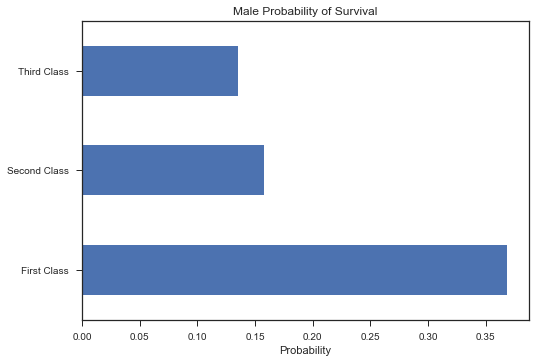

In [30]:
#plot male probability of survival per class

male_survival = men_class_survival_prob.plot(kind='barh',title='Male Probability of Survival')

male_survival.set_xlabel('Probability');

Although the greatest amount of men that survived were in 3rd Class, you still had a greater chance of survival being a 1st Class male on the Titanic. This is because first class had the smallest group of males and nearly 37% of them survived in comparison to the 3rd Class with a survival rate of around 14% (3rd Class had a total of 347 men!)  A very sad statistic indeed!

### SIBLINGS/SPOUSE

I wonder if number of siblings/spouse, parents, or children had any effect on survival of men.  Let's see what the distribution looks like for both.  But first, let's find the average number of siblings/spouse for males in each class.  Then, we can find the average parents/children for males in each class.

In [31]:
male_sibsp = male_survivors.groupby('Class').mean()['SibSp']
male_sibsp

Class
First Class     0.377778
Second Class    0.529412
Third Class     0.340426
Name: SibSp, dtype: float64

In [32]:
#siblings/spouse for non survivors

male_sibsp_not = male_not_survived.groupby('Class').mean()['SibSp']
male_sibsp_not

Class
First Class     0.272727
Second Class    0.307692
Third Class     0.523333
Name: SibSp, dtype: float64

### PARENTS/CHILDREN

In [33]:
#average number of parents/children(Parch) for surviving men in each class

male_parch = male_survivors.groupby('Class').mean()['Parch']
male_parch

Class
First Class     0.311111
Second Class    0.647059
Third Class     0.297872
Name: Parch, dtype: float64

In [34]:
#average number of parents/children(Parch) for men that did not survive in each class

male_parch_not = male_not_survived.groupby('Class').mean()['Parch']
male_parch_not

Class
First Class     0.259740
Second Class    0.142857
Third Class     0.213333
Name: Parch, dtype: float64

In [35]:
males_on_titanic = titanic[titanic.Sex.isin(['male'])]
males_on_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Died,Third Class
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Died,Third Class
5,6,0,3,"Moran, Mr. James",male,Adult,0,0,330877,8.4583,Q,Died,Third Class
6,7,0,1,"McCarthy, Mr. Timothy J",male,Older Adult,0,0,17463,51.8625,S,Died,First Class
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,349909,21.0750,S,Died,Third Class


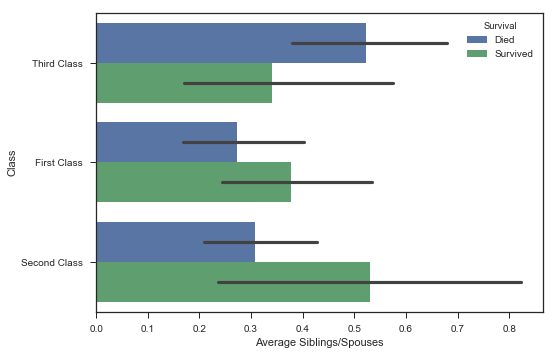

In [36]:
#distribution for surviving and non surviving males and the average number of siblings/spouses

males_siblings_plot = sns.barplot(x='SibSp',y='Class',hue='Survival',data=males_on_titanic)

males_siblings_plot.set_xlabel('Average Siblings/Spouses');

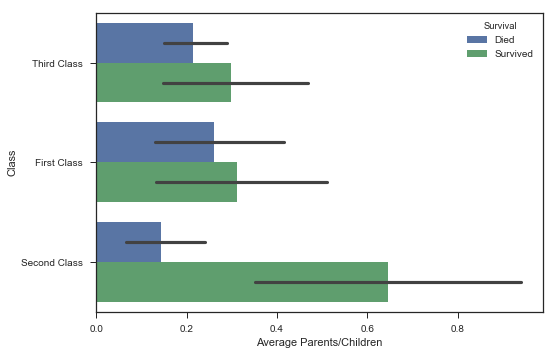

In [37]:
#distribution for surviving and non surviving males and average number of parents/children

males_parch_plot = sns.barplot(x='Parch',y='Class',hue='Survival', data=males_on_titanic)

males_parch_plot.set_xlabel('Average Parents/Children');

When looking at the bar plots for males with siblings, a spouse, parents, and/or children, it looks like more often than not, those that survived had more family with them.  The only acception were those in 3rd class with more siblings and/or a spouse.  In that case, the survivors had less siblings/spouses on average.  

## FEMALES

In [38]:
#rows from titanic with unlikely variables for women aboard the Titanic

female_not_survived = titanic[titanic.Sex.isin(['female'])].merge(titanic[titanic.Survived.isin([0])])
female_not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,Adult,0,0,350406,7.8542,S,Died,Third Class
1,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,Adult,1,0,345763,18.0000,S,Died,Third Class
2,25,0,3,"Palsson, Miss. Torborg Danira",female,Child,3,1,349909,21.0750,S,Died,Third Class
3,39,0,3,"Vander Planke, Miss. Augusta Maria",female,Adult,2,0,345764,18.0000,S,Died,Third Class
4,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,Adult,1,0,7546,9.4750,S,Died,Third Class


In [39]:
num_female_class = female_not_survived['Class'].value_counts()
num_female_class

Third Class     72
Second Class     6
First Class      3
Name: Class, dtype: int64

In [40]:
#females that survived

females_survived = titanic[titanic.Sex.isin(['female'])].merge(titanic[titanic.Survived.isin([1])])
females_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,Survived,First Class
1,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Survived,Third Class
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,Survived,First Class
3,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Adult,0,2,347742,11.1333,S,Survived,Third Class
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Adult,1,0,237736,30.0708,C,Survived,Second Class


In [41]:
num_female_class_survived = females_survived['Class'].value_counts()
num_female_class_survived

First Class     91
Third Class     72
Second Class    70
Name: Class, dtype: int64

In [42]:
female_class_survival_prob = num_female_class_survived/(num_female_class_survived + num_female_class)
female_class_survival_prob

First Class     0.968085
Second Class    0.921053
Third Class     0.500000
Name: Class, dtype: float64

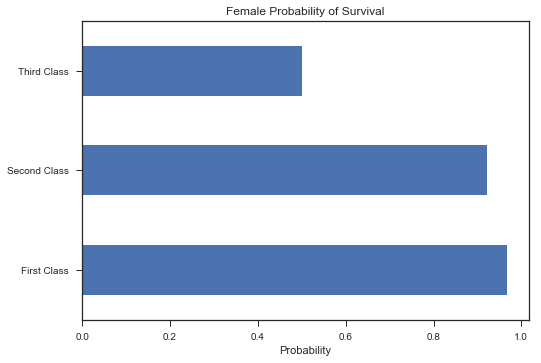

In [43]:
#plot the probability of survival for females of each class

female_class = female_class_survival_prob.plot(kind='barh',title='Female Probability of Survival')

female_class.set_xlabel('Probability');

For the females, I started out analyzing the data from those that did not survive and continued by analyzing data from survivors as well.  We can see from the probabilities that survival rate was highest in 1st Class.  Still, a 50% chance of survival for females in 3rd Class is still higher than even the highest rate for males in any class.

### SIBLINGS/SPOUSE

In [44]:
#average number of siblings/spouses for female survivors

female_sibsp = females_survived.groupby('Class').mean()['SibSp']
female_sibsp

Class
First Class     0.549451
Second Class    0.485714
Third Class     0.500000
Name: SibSp, dtype: float64

In [45]:
#average siblings/spouses for non survivors

female_sibsp_not = female_not_survived.groupby('Class').mean()['SibSp']
female_sibsp_not

Class
First Class     0.666667
Second Class    0.500000
Third Class     1.291667
Name: SibSp, dtype: float64

### PARENTS/CHILDREN

In [46]:
#average number of parents/children(Parch) for surviving females in each class

female_parch = females_survived.groupby('Class').mean()['Parch']
female_parch

Class
First Class     0.428571
Second Class    0.642857
Third Class     0.500000
Name: Parch, dtype: float64

In [47]:
#average number of parents/children(Parch) for men that did not survive in each class

female_parch_not = female_not_survived.groupby('Class').mean()['Parch']
female_parch_not

Class
First Class     1.333333
Second Class    0.166667
Third Class     1.097222
Name: Parch, dtype: float64

In [48]:
#female dataset

females_on_titanic = titanic[titanic.Sex.isin(['female'])]
females_on_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,Survived,First Class
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Adult,0,2,347742,11.1333,S,Survived,Third Class
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Adult,1,0,237736,30.0708,C,Survived,Second Class


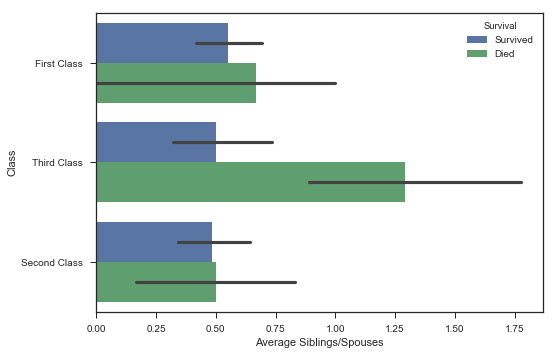

In [49]:
#distribution for surviving and non surviving females and the average number of siblings/spouses

females_siblings_plot = sns.barplot(x='SibSp',y='Class',hue='Survival', data=females_on_titanic)

females_siblings_plot.set_xlabel('Average Siblings/Spouses');

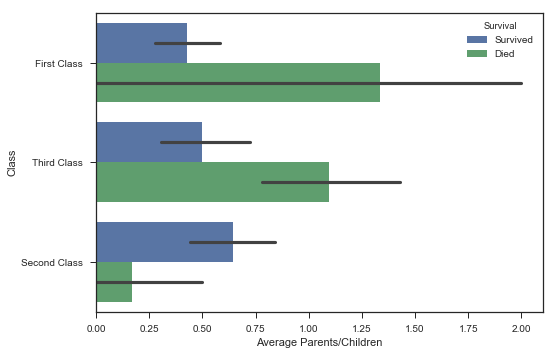

In [50]:
#distribution for surviving and non surviving females and average number of parents/children

females_parch_plot = sns.barplot(x='Parch',y='Class',hue='Survival', data=females_on_titanic)

females_parch_plot.set_xlabel('Average Parents/Children');

In looking at the female data for average number of siblings/spouses and parents/children per class, we see that, for the most part, females traveling with more family on average were not survivors.  The acception was for females in 2nd class who showed that the survivors had more parents/children on average.   

<b>Limitations and Challenges</b>
<br>
<br>
After going through the data, I could see that I would be limited to a hand full of variables to consider.  Since the 'Cabin' column was all but empty, the best thing to do was to drop it entirely.  

My biggest challenge by far would have to be the analysis of the age groups.  I'm still not certain I was able to place each person in the appropriate age group, especially since some unmarried older females would have had the title 'Miss' and it may have been better to place them in the adult age group.  Still, those unmarried women were most likely still taken care of by their fathers as any child would have been in those days.  The complicated nature of the "Mrs" and "Miss" forms of address can be realized in a well sited research paper written by Amy Louise Erickson, which can be read at http://www.geog.cam.ac.uk/research/projects/occupations/abstracts/paper25.pdf.

Another challenge came when presenting the data through various visualizations.  It's always a challange to present the data in a meaningful way.  In addition to a scatter plot and some boxplots, I was glad to have come across some visually pleasing bar plots I could modify to present the data well.  Of course, with most of the data being qualitative, that made it all the more difficult to show the data in various ways.  

<b>Conclusion</b>
<br>
<br>
After looking at the data multiple ways in order to gage survivability, we were able to make some assumptions when considering Sex, Class, Age, and Family.  If we had been passengers aboard the RMS Titanic on April 14th, 1912, we probably would have wanted to be a female infant.  That way, we would have had the greatest chance of survival AND we most likely wouldn't have any memory of those horrific events.  Of course, if we had been an adult passenger, being a 1st class female would have been our best bet.  As for traveling with family, it may have increased our chances of survival had we been male.  But, unless we were 2nd class females, we would have had a disadvantage as a female traveling with family.  

No matter the probabilities, I am glad to have not been traveling on the Titanic that night in 1912.  